## Import library

In [1]:
import pandas as pd
import numpy as np
# visualization
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Collecting data

## What subject is your data about? What is the source of your data?

The subject of our data is about movies and TV shows on Netflix. The source of our data is from [Kaggle](https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies?select=credits.csv)

## Do authors of this data allow you to use like this?

Yes, the authors of this data allow us to use like this, because they have a license of CC0: Public Domain.

## How did authors collect data?

The author collected data from the API of JustWatch website, to get the data all he had to do was the requests package. ([Source](https://github.com/victor-soeiro/WebScraping-Projects/blob/main/08%20-%20justwatch/main.ipynb))

# 2. Exploring data

* How many rows and how many columns?
* What is the meaning of each row?
* Are there duplicated rows?
* What is the meaning of each column?
* What is the current data type of each column? Are there
columns having inappropriate data types?
* With each numerical column, how are values distributed?
* What is the percentage of missing values?
* Min? max? Are they abnormal?
* With each categorical column, how are values distributed?
* What is the percentage of missing values?
* How many different values? Show a few
* Are they abnormal?

### Load Dataset

In [2]:
credits_df = pd.read_csv('credits.csv')
titles_df = pd.read_csv('titles.csv')

### How many rows and how many columns?

In [3]:
credits_df.shape

(77801, 5)

In [4]:
titles_df.shape

(5850, 15)

### What is the meaning of each row?

In [5]:
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77801 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  77801 non-null  int64 
 1   id         77801 non-null  object
 2   name       77801 non-null  object
 3   character  68029 non-null  object
 4   role       77801 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.0+ MB


In [6]:
titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5850 entries, 0 to 5849
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5850 non-null   object 
 1   title                 5849 non-null   object 
 2   type                  5850 non-null   object 
 3   description           5832 non-null   object 
 4   release_year          5850 non-null   int64  
 5   age_certification     3231 non-null   object 
 6   runtime               5850 non-null   int64  
 7   genres                5850 non-null   object 
 8   production_countries  5850 non-null   object 
 9   seasons               2106 non-null   float64
 10  imdb_id               5447 non-null   object 
 11  imdb_score            5368 non-null   float64
 12  imdb_votes            5352 non-null   float64
 13  tmdb_popularity       5759 non-null   float64
 14  tmdb_score            5539 non-null   float64
dtypes: float64(5), int64(

### Are there duplicated rows?

In [7]:
print('Duplicated date in credits_df:', credits_df.duplicated().sum())
print('Duplicated date in titles_df:', titles_df.duplicated().sum())

Duplicated date in credits_df: 0
Duplicated date in titles_df: 0


### What is the meaning of each column?

1. Credit's column information 


| Colunm Name | Information             |
|-------------|-------------------------|
| person_id   | The id of this person   |
| id          | The id                  |
| name        | The name of this person |
| character   | The character in film   |
| role        | The role of this person | 

2. Title's column information

| Column name          | Information                                   |
|----------------------|-----------------------------------------------|
| id                   | The ID of movie                               |
| title                | The name of movie                             |
| type                 | The type of movie                             |
| description          | The description of movie                      |
| release_year         | The year release of movie                     |
| age_certification    | The age limit of movie                        |
| runtime              | Movie duration                                |
| genres               | The genres of movie                           |
| production_countries | The country product movie                     |
| seasons              | The season of movie or TV shows               |
| imdb_id              | The ID of movie on Internet Movie Database    |
| imdb_score           | The score of movie on Internet Movie Database |
| imdb_votes           | The vote of movie on Internet Movie Database  |
| tmdb_popularity      | The popularity of movie on The Movie Database |
| tmdb_score           | The score of movie on The Movie Database      |


### What is the current data type of each column? Are there columns having inappropriate data types?


In [8]:
credits_df.dtypes

person_id     int64
id           object
name         object
character    object
role         object
dtype: object

In [9]:
titles_df.dtypes

id                       object
title                    object
type                     object
description              object
release_year              int64
age_certification        object
runtime                   int64
genres                   object
production_countries     object
seasons                 float64
imdb_id                  object
imdb_score              float64
imdb_votes              float64
tmdb_popularity         float64
tmdb_score              float64
dtype: object

Convert realease_year to datetime and person_id, id to string

In [10]:
titles_df['release_year'] = pd.to_datetime(titles_df['release_year'])
credits_df['person_id'] = credits_df['person_id'].astype('str')
titles_df['id'] = titles_df['id'].astype('str')

In [11]:
titles_df.dtypes

id                              object
title                           object
type                            object
description                     object
release_year            datetime64[ns]
age_certification               object
runtime                          int64
genres                          object
production_countries            object
seasons                        float64
imdb_id                         object
imdb_score                     float64
imdb_votes                     float64
tmdb_popularity                float64
tmdb_score                     float64
dtype: object

In [12]:
credits_df.dtypes

person_id    object
id           object
name         object
character    object
role         object
dtype: object

As we can see, the data type of each column is appropriate.

### With each numerical column, how are values distributed?

In titles dataset, we have 2 numerical columns: release_year, runtime, seasons. In credits dataset, we have no numerical columns.

In [13]:
#not include release_year
titles_df.describe(include=[np.number])

,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5850.000000,2106.000000,5368.000000,5.352000e+03,5759.000000,5539.000000
mean,76.888889,2.162868,6.510861,2.343938e+04,22.637925,6.829175
std,39.002509,2.689041,1.163826,9.582047e+04,81.680263,1.170391
min,0.000000,1.000000,1.500000,5.000000e+00,0.009442,0.500000
25%,44.000000,1.000000,5.800000,5.167500e+02,2.728500,6.100000
50%,83.000000,1.000000,6.600000,2.233500e+03,6.821000,6.900000
75%,104.000000,2.000000,7.300000,9.494000e+03,16.590000,7.537500
max,240.000000,42.000000,9.600000,2.294231e+06,2274.044000,10.000000


### What is the percentage of missing values?

In [14]:

missing_value_titles_df = pd.DataFrame(
    {'The_percentage_of_missing_value': (titles_df.isnull().sum()/titles_df.shape[0]) * 100}
)
missing_value_titles_df.round(2)

,The_percentage_of_missing_value
id,0.00
title,0.02
type,0.00
description,0.31
release_year,0.00
age_certification,44.77
runtime,0.00
genres,0.00
production_countries,0.00
seasons,64.00


In [15]:
missing_value_credits_df = pd.DataFrame(
    {'The_percentage_of_missing_value': (credits_df.isnull().sum()/credits_df.shape[0]) * 100}
)
missing_value_credits_df.round(2)

,The_percentage_of_missing_value
person_id,0.00
id,0.00
name,0.00
character,12.56
role,0.00


### With each categorical column, how are values distributed?

In [16]:
credits_nonnumeric_df = credits_df.select_dtypes(exclude=[np.number])
credits_nonnumeric_df.head()

,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [17]:
non_nummeric_col_info_credit = pd.DataFrame({
     'missing_percentage': ((credits_nonnumeric_df.isnull().sum()/credits_nonnumeric_df.shape[0]) * 100),
     'num_values': len(credits_nonnumeric_df.value_counts().keys()),
     'value_counts': {'person_id': pd.Series(credits_nonnumeric_df['person_id'].value_counts().to_dict()), \
                      'id': pd.Series(credits_nonnumeric_df['id'].value_counts().to_dict()), \
                      'name': pd.Series(credits_nonnumeric_df['name'].value_counts().to_dict()), \
                      'character': pd.Series(credits_nonnumeric_df['character'].value_counts().to_dict()), \
                      'role': pd.Series(credits_nonnumeric_df['role'].value_counts().to_dict())}}).T
non_nummeric_col_info_credit

,person_id,id,name,character,role
missing_percentage,0.0,0.0,0.0,12.56025,0.0
num_values,68029,68029,68029,68029,68029
value_counts,38636 25 48004 25 38632 23 138 ...,tm32982 208 tm244149 174 tm39888 ...,Kareena Kapoor Khan 25 Boman Irani ...,Self 1950 Himself ...,ACTOR 73251 DIRECTOR 4550 dtype: int64


### Check the correction of relationship between dataset


In [18]:
#check if the id in credits_df is in titles_df
id_not_in_titles_df = credits_df[~credits_df['id'].isin(titles_df['id'])]
print('The number of id not in titles_df:', id_not_in_titles_df.shape[0])

The number of id not in titles_df: 0


# 3. Asking meaningful questions

Which TV shows having one season have the highest and lowest IMDb score and popularity?
<br/> Answer this question will help Netflix know which TV shows that need to produce more seasons or be canceled. This will help Netflix avoid losing money on TV shows that have low popularity and score.

Which actors/actresses have acted in the most genres in Netflix movies and TV shows? 
<br/> Answer this question will help us to know which actor/actress is the most versatile actor/actress. This will help Netflix know which actor/actress they should hire to play in their movies and TV shows.

# 4. Preprocessing and analyzing data to answer each question

Which TV shows having one season have the highest and lowest IMDb score and popularity?
<br/> This question will need to preprocess the data:
* Fill the TV shows having null value in seasons column with 1.


In [19]:
titles_df['seasons'] = titles_df['seasons'].fillna(1)

Analyzing data to answer this question:
* Filter the data having seasons is 1 and type is TV Show
* Sort the data by imdb_score and tmdb_popularity by highest to lowest and lowest to highest

In [20]:
#Filter the data having seasons is 1 and type is TV Show
show_df = titles_df[titles_df['type'] == 'SHOW']
show_df= show_df[show_df['seasons'] == 1]
#Sort the data by imdb_score and tmdb_popularity by highest to lowest and lowest to highest
highest_show_imdb_score_df = show_df[['title', 'imdb_score']].sort_values(by='imdb_score', ascending=False).reset_index(drop=True)
highest_show_tmdb_popularity_df = show_df[['title', 'tmdb_popularity']].sort_values(by='tmdb_popularity', ascending=False).reset_index(drop=True)
lowest_show_imdb_score_df = show_df[['title', 'imdb_score']].sort_values(by='imdb_score', ascending=True).reset_index(drop=True)
lowest_show_tmdb_popularity_df = show_df[['title', 'tmdb_popularity']].sort_values(by='tmdb_popularity', ascending=True).reset_index(drop=True)

Visualize the data to answer this question:

/home/lephu13502/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 47560 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lephu13502/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48277 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lephu13502/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 48260 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lephu13502/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/lephu13502/miniconda3/envs/min_ds-env/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s

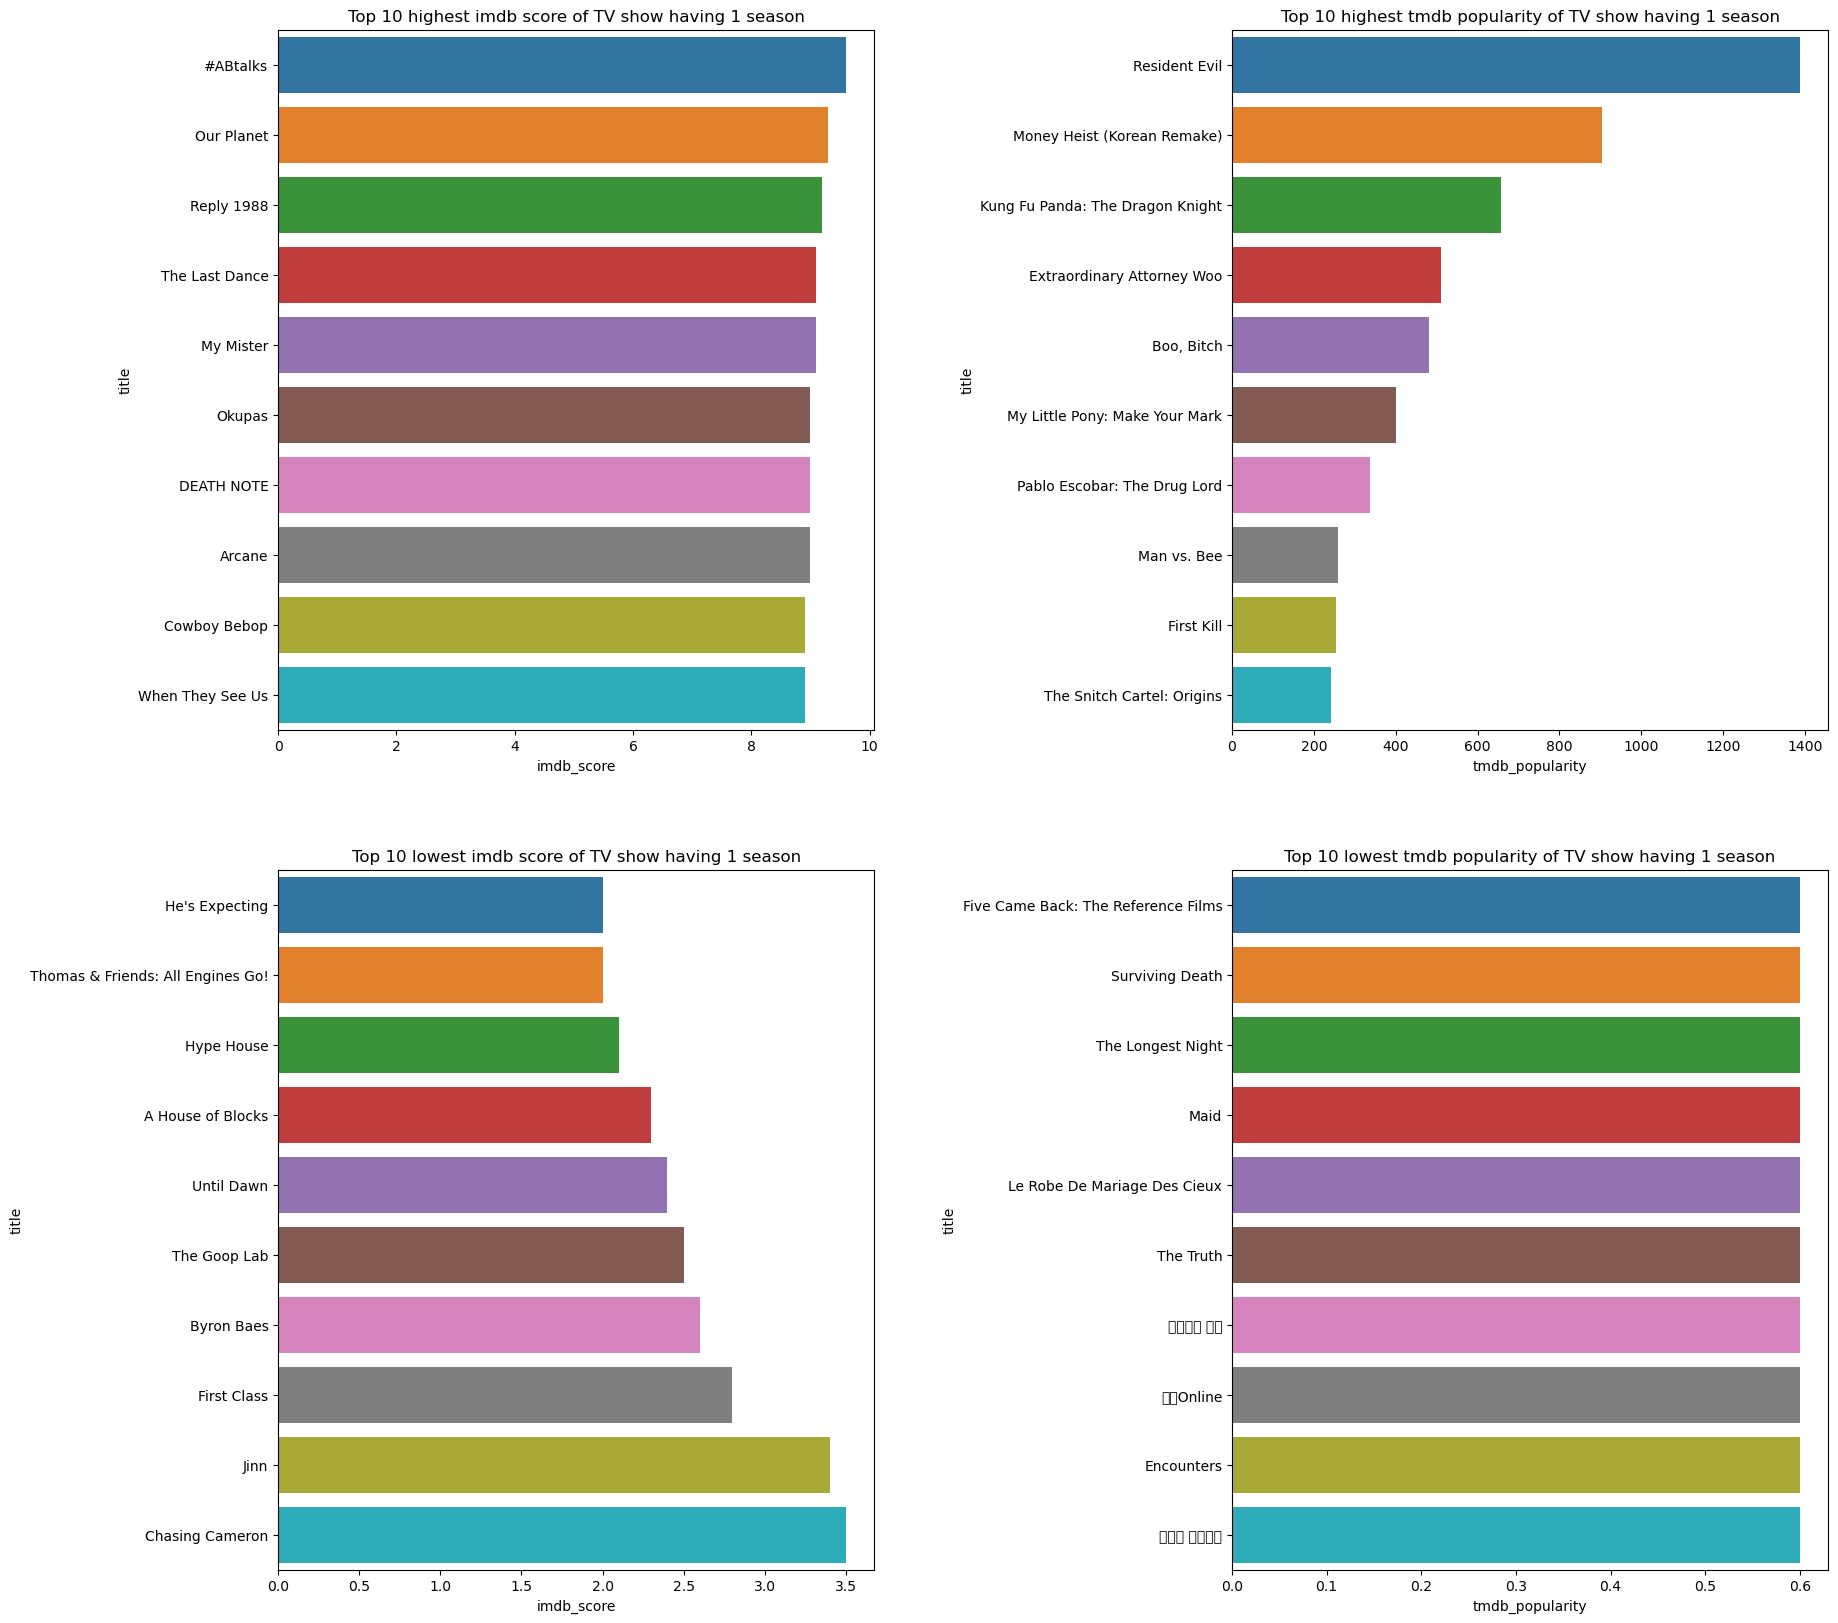

In [21]:
#visualize horizontal bar chart
fig, ax = plt.subplots(2, 2, figsize=(20, 20))
sns.barplot(x='imdb_score', y='title', data=highest_show_imdb_score_df.head(10), ax=ax[0, 0])
sns.barplot(x='tmdb_popularity', y='title', data=highest_show_tmdb_popularity_df.head(10), ax=ax[0, 1])
sns.barplot(x='imdb_score', y='title', data=lowest_show_imdb_score_df.head(10), ax=ax[1, 0])
sns.barplot(x='tmdb_popularity', y='title', data=lowest_show_tmdb_popularity_df.head(10), ax=ax[1, 1])
ax[0, 0].set_title('Top 10 highest imdb score of TV show having 1 season')
ax[0, 1].set_title('Top 10 highest tmdb popularity of TV show having 1 season')
ax[1, 0].set_title('Top 10 lowest imdb score of TV show having 1 season')
ax[1, 1].set_title('Top 10 lowest tmdb popularity of TV show having 1 season')
#increase the space between subplots
plt.subplots_adjust(wspace=0.6)


Which actors/actresses have acted in the most genres in Netflix movies and TV shows? 


This question doesn't need to preprocess the data because there is no missing value in the 'role' and 'genres' columns.

To analyze the data to answer this question, we need to:
* Filter the data having role is Actor
* Group the data by person_id and sum the genres
* Sort the data by genres by highest to lowest

In [58]:
most_genres_actor = credits_df[credits_df['role'] == 'ACTOR']
#with each id of actor, find the movie name in titles_df and get the genres of each movie
most_genres_actor = most_genres_actor.merge(titles_df[['id', 'genres']], on='id', how='left')
#group by person_id and sum the genres of each actor
most_genres_actor = most_genres_actor.groupby('person_id')['genres'].sum().reset_index()
#count the number of genres of each actor
most_genres_actor['genres'] = most_genres_actor['genres'].apply(lambda x: len(x.split(',')))
#sort the data by genres by highest to lowest
most_genres_actor = most_genres_actor.sort_values(by='genres', ascending=False).reset_index(drop=True)
#merge the data with credits_df to get the name of actor
most_genres_actor = most_genres_actor.merge(credits_df[['person_id', 'name']], on='person_id', how='left')
#drop the duplicate name
most_genres_actor = most_genres_actor.drop_duplicates(subset=['name'])
most_genres_actor.head(10)

,person_id,genres,name
0,11283,82,Yuki Kaji
19,138,81,Takahiro Sakurai
40,6821,71,Fred Tatasciore
58,75908,69,Kenjiro Tsuda
75,30778,66,Junichi Suwabe
94,14142,63,Grey DeLisle
109,38636,62,Boman Irani
134,20372,62,Tara Strong
147,14143,61,Kari Wahlgren
164,85702,60,Mamoru Miyano


Visualize the data to answer this question:

Text(0.5, 1.0, 'Top 10 actors who have acted in the most genres')

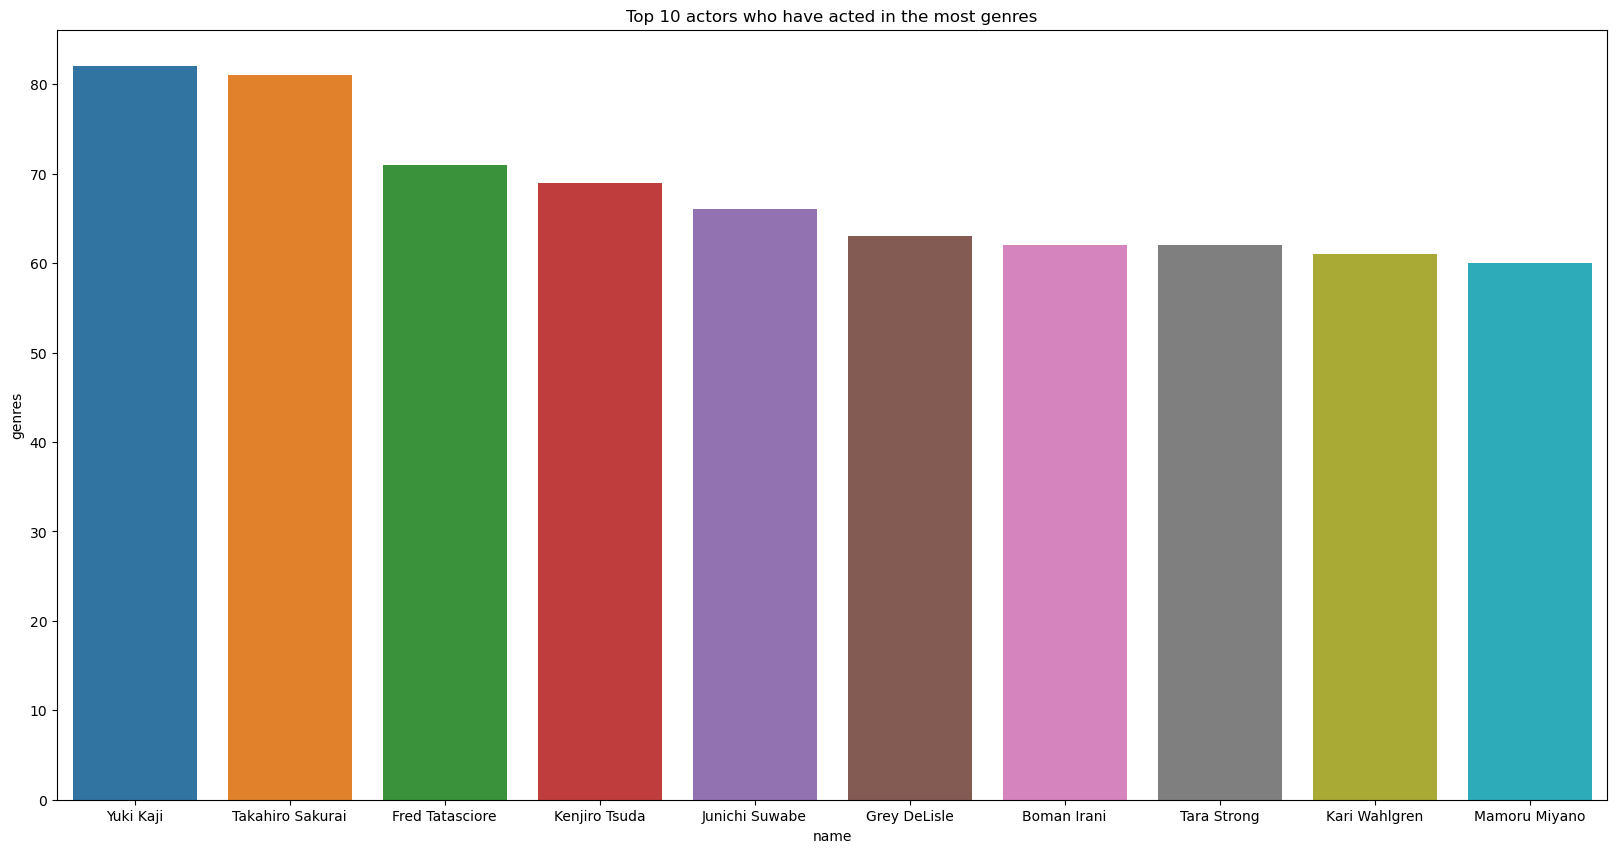

In [59]:
#visualize vertical bar chart
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x='name', y='genres', data=most_genres_actor.head(10), ax=ax)
ax.set_title('Top 10 actors who have acted in the most genres')


# 5. Reflection

# 6. References